C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\clust

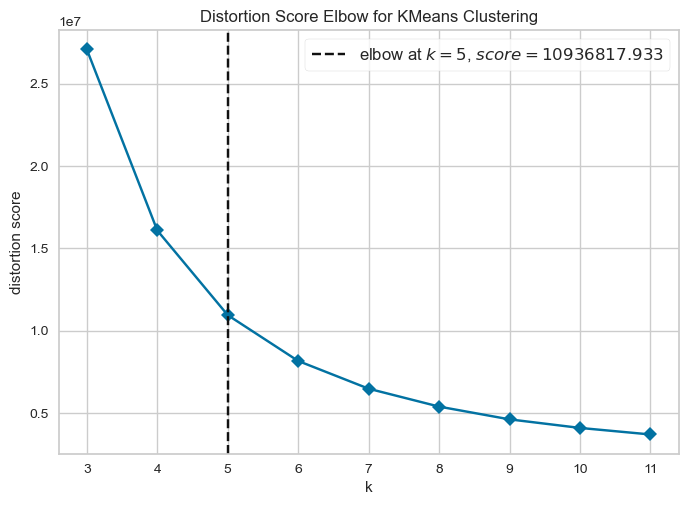

C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means (k=5) - Time Taken: 0.9892 seconds
K-Means (k=5) - Memory Usage: 302.28 MB
K-Means (k=5) - Silhouette Score: 0.5018
K-Means (k=5) - Davies-Bouldin Score: 0.5843
K-Means (k=5) - Cluster Composition:
3    16467
0    16055
1    16003
4    15900
2    15575
dtype: int64



C:\Users\hemi1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
!pip install yellowbrick
import pandas as pd
from sklearn.cluster import KMeans, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import time
import psutil
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Define a function to print memory usage
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024**2  # Memory usage in MB

# Function to perform clustering and measure time, memory, silhouette score, and Davies-Bouldin score
def perform_clustering(X_data, model, name, visualizer=None, **kwargs):
    start_time = time.time()

    # Create clustering model
    clustering_model = model(**kwargs)

    # Fit and predict clusters
    clusters = clustering_model.fit_predict(X_data)

    # Measure time taken
    time_taken = time.time() - start_time

    # Measure memory usage
    memory_usage = get_memory_usage()

    # Measure silhouette score
    silhouette = silhouette_score(X_data, clusters)

    # Measure Davies-Bouldin score
    db_score = davies_bouldin_score(X_data, clusters)

    # Display results
    print(f"{name} - Time Taken: {time_taken:.4f} seconds")
    print(f"{name} - Memory Usage: {memory_usage:.2f} MB")
    print(f"{name} - Silhouette Score: {silhouette:.4f}")
    print(f"{name} - Davies-Bouldin Score: {db_score:.4f}")
    print(f"{name} - Cluster Composition:\n{pd.Series(clusters).value_counts()}\n")

    # Visualize Silhouette score
    if visualizer:
        visualizer.fit(X_data, clusters)
        visualizer.show()

    return clusters

# Read data from Excel file
df = pd.read_excel('100000 Sales Records.xlsx')
df.drop(['Order Date', 'Order ID', 'Ship Date'], axis=1, inplace=True)

# Handle missing values
df[['Unit Price', 'Unit Cost']] = SimpleImputer(strategy='mean').fit_transform(df[['Unit Price', 'Unit Cost']])

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Handle remaining missing values (if any)
df.dropna(inplace=True)

# Standardize numerical features
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

# Split the data into features and labels
X = df.drop(columns=['Total Profit'])  # Features
y = df['Total Profit']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the elbow method to find the optimal number of clusters for K-Means
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(3, 12), timings=False)
visualizer.fit(X_train)
visualizer.show()

# Choose the optimal number of clusters based on the elbow method for K-Means
optimal_clusters_kmeans = 5  # Update this based on the elbow method result

# Perform K-Means clustering
perform_clustering(X_train, KMeans, "K-Means (k=5)", SilhouetteVisualizer(KMeans(n_clusters=optimal_clusters_kmeans)), n_clusters=optimal_clusters_kmeans)
perform_clustering(X_test, KMeans, "K-Means (k=5)", SilhouetteVisualizer(KMeans(n_clusters=optimal_clusters_kmeans)), n_clusters=optimal_clusters_kmeans)

# Perform Birch clustering
threshold = 0.5  # Adjust the threshold as needed
perform_clustering(X_train, Birch, "Birch", SilhouetteVisualizer(Birch(threshold=threshold, branching_factor=50)), threshold=threshold, branching_factor=50)
perform_clustering(X_test, Birch, "Birch", SilhouetteVisualizer(Birch(threshold=threshold, branching_factor=50)), threshold=threshold, branching_factor=50)
